# random-generated but not orthogonal

In [29]:
import numpy as np

Generating a numpy-matrix of couples of an ellipse

In [54]:
def random_points(sdx, sdy, n):
    X, Y = np.random.normal(0, sdx, n), np.random.normal(0, sdy, n)
    return np.concatenate( (X, Y)).reshape(2, n)

In [56]:
np_ellipse = random_points(10, 5, 5000)
print(np_ellipse)

[[  6.86651778 -24.74959763  -9.35843726 ...,   9.30466812  11.99567352
  -18.24732464]
 [  4.0923218    1.22664269   4.85308851 ...,   9.8145626    7.96225837
   -0.11807938]]


In [38]:
%matplotlib inline
from matplotlib import pyplot as plt

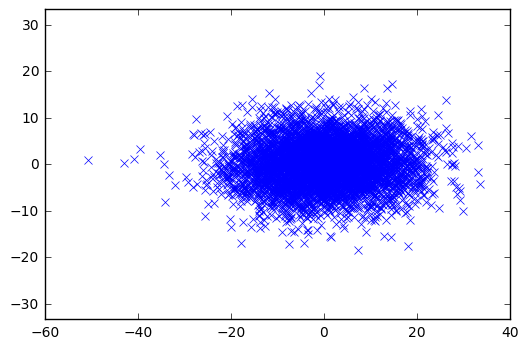

In [40]:
plt.plot(np_ellipse[0], np_ellipse[1], 'bx')
plt.axis('equal')
plt.show()

## applying a non-isometric linear transformation

Now instead of taking this as-is, we will apply a non-isometric transformation first:

* (1, 0) -> (1, 0)
* (0, 1) -> (1, 1)

In [2]:
twist = np.array([1, 1, 0, 1]).reshape(2, 2)

In [3]:
# checking
print(np.dot(twist, [1, 0]))
print(np.dot(twist, [0, 1]))

[1 0]
[1 1]


In [41]:
np_twisted = twist.dot(np_ellipse)

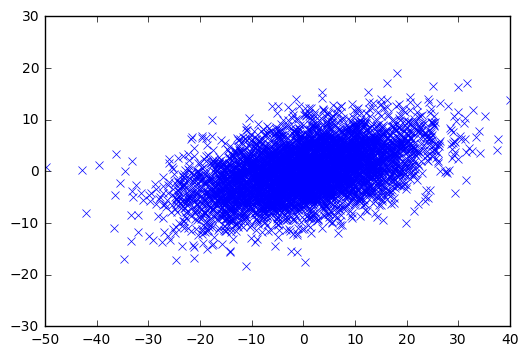

In [42]:
plt.plot(np_twisted[0], np_twisted[1], 'bx')
plt.axis('equal')
plt.show()

## Running the ACP on that

In [43]:
e = np_twisted

In [45]:
C = np.cov(e)
print(C)

[[ 128.45155529   26.15866993]
 [  26.15866993   24.35359199]]


In [49]:
eigen, A = np.linalg.eig(C)
print(eigen)
print(A)

[ 134.65523455   18.14991273]
[[ 0.9730118  -0.23075535]
 [ 0.23075535  0.9730118 ]]


In [52]:
roots = np.sqrt(eigen)
v1 = roots[0] * np.array( [1, 0])
v2 = roots[1] * np.array( [0, 1])
r1 = A.dot(v1)
r2 = A.dot(v2)

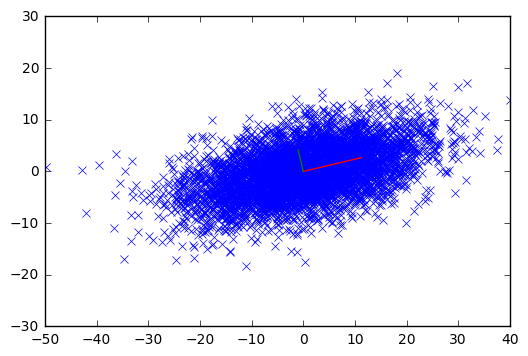

In [53]:
plt.plot(np_twisted[0], np_twisted[1], 'bx')
plt.axis('equal')
plt.plot( (0, r1[0]), (0, r1[1]), 'r-')
plt.plot( (0, r2[0]), (0, r2[1]), 'g-')
plt.show()